# import necessary modules

* numpy for matrix calculation, `pip install numpy`
* matplotlib for plot figures, `pip install matplotlib`

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# functions for plot

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def plot_fig(w, x, y):
    w = w.tolist()[0]
    fig = plt.figure()
    ax = Axes3D(fig, azim=-80)

    x1 = np.linspace(0,1,30)
    x2 = np.linspace(0,1,30)
    x1, x2 = np.meshgrid(x1, x2)
    a = sigmoid(w[0]*x1 + w[1]*x2 + w[2])

    ax.plot_surface(x1, x2, a, rstride=1, cstride=1, cmap='rainbow')
    ax.scatter(x[0,:],x[1,:],y,)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    
    plt.title("model")
    #plt.savefig("data-scatter.jpg")
    
def plot_decision_line(w, x, y,d1=0,d2=1):
    #print(y)
    fig = plt.figure()
    w = w.tolist()[0]
    xx = np.linspace(0,1,30)
    yy = -(w[d1]*xx + w[-1]+0.5)/w[d2]
    plt.plot(xx, yy,label="decision line")
    pos_x = np.array([x[:,i] for i in range(len(y[0])) if y[0][i] == 1]).transpose()
    neg_x = np.array([x[:,i] for i in range(len(y[0])) if y[0][i] == 0]).transpose()
    plt.plot(pos_x[d1], pos_x[d2], 'rd', label="pos")
    plt.plot(neg_x[d1], neg_x[d2], 'b*', label="neg")
    plt.legend()
    plt.title("decision line")

# prepare dataset D


1. load data `x` and `y` from the file `x.npy` and `y.npy`, respectively
2. adding bias term `1` to `x`


In [3]:
x = np.load("X.npy")
print("original shape of x:{}".format(x.shape))
x = np.concatenate([x, np.ones((1,x.shape[1]))])
print("new shape of x:{}".format(x.shape))
y = np.load("y.npy")
print("shape of y:{}".format(y.shape))


original shape of x:(30, 569)
new shape of x:(31, 569)
shape of y:(1, 569)


# implement the function below for logistic model

$a = \sigma (wx)$, where

- $x \in R^{31\times n}$
- $w \in R^{1\times 31}$
- $\sigma (z) = \frac{1}{1+e^{-z}}$

In [4]:

def sigmoid(z):
    #### Your code here ####
    condition=z>0
    z[condition]=1/(1+np.exp(-z[condition]))
    t=np.exp(z[~condition])
    z[~condition]=t/(t+1)
    a=z
    ########################
    return a
def logisticModel(w, x):
    #### Your code here ####
    a = sigmoid(w@x)
    ########################
    return a


# define cost function and accuracy


$J= \frac{1}{m}\sum_{i=1}^{m}{\left[y^{i}\cdot \log(a^{i})+(1-y^{i})\cdot \log(1-a^{i})\right]}$

$\frac{\partial J}{\partial w} = (a-y)x^{T}$


In [5]:
def cost(a, y):
    #### Your code here ####
    m=a.shape[1]
    a[a<1e-9]=1e-9
    a[np.abs(1-a)<1e-9]=1-1e-9
    J =- np.sum(y*np.log(a)+(1-y)*np.log(1-a))/m
    ########################
    return J

def grad(a, x, y):
    #### Your code here ####
    m=a.shape[1]
    grad_w = (a-y)@x.T/m
    ########################
    return grad_w
    
def accuarcy(a, y, tao=0.5):
    #### Your code here ####
    a=a.copy()
    m=a.shape[1]
    condition=a>tao
    a[condition]=1
    a[~condition]=0
    acc =1- np.sum(np.abs(a-y))/m
    ########################
    return acc


# gradient descent algorithm

----------------------------------------
gradient descent method: w=[[ 0.61499433  0.14670312 -0.3162677  -0.03108526  0.10023557  0.0319706
   0.92967003  0.55924389  0.1357957   0.78012591  0.95492964  0.15510097
   0.25179574  0.13307594  0.85872786  0.65331743  0.47810933  0.98042041
   0.05367031  0.11083836  0.47649816  0.32263245 -0.44308069  0.0753024
   0.99405671  0.05630843  0.33159491  0.93020868  0.53195747  0.08306174
   0.92760837]]
----------------------------------------


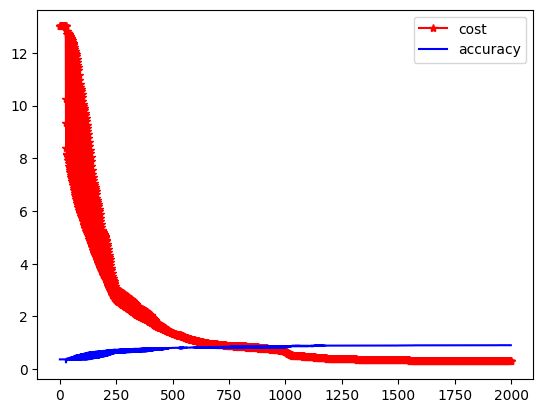

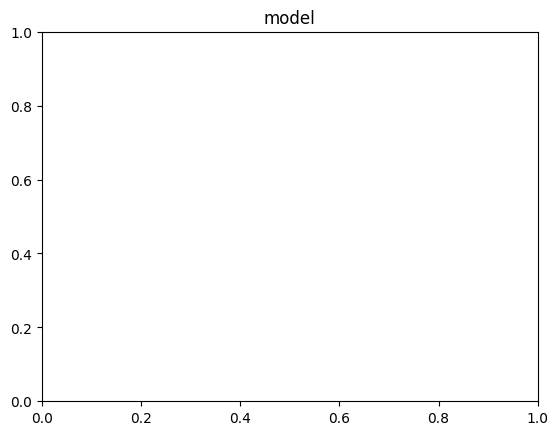

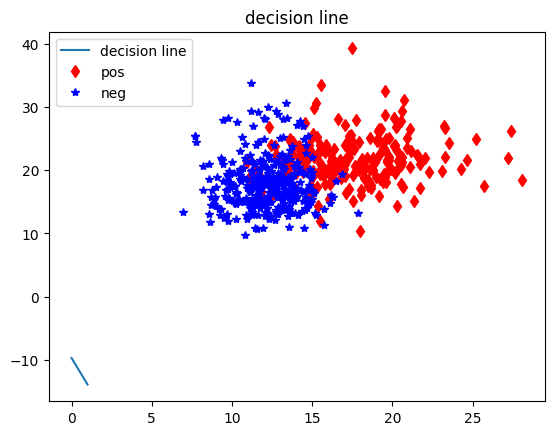

In [6]:
w = np.random.rand(1, x.shape[0])

alpha = 0.9e-4
Js = []
accs = []

for i in range(2000):
    a = logisticModel(w, x)
    grad_w = grad(a, x, y)
    w = w - alpha * grad_w
    Js.append(cost(a, y))
    accs.append(accuarcy(a, y))
    alpha*=1-1e-4 #发现训练过程中有cost突增的情况，那么通过逐步减小学习率解决 

plt.plot(Js,'r-*',label="cost")
plt.plot(accs,'b-',label="accuracy")
plt.legend()
plt.savefig("cost.jpg")
print("-"*40)
print("gradient descent method: w={}".format(w))
print("-"*40)    
    
plot_fig(w, x, y)

plot_decision_line(w, x, y)

# load data

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


ModuleNotFoundError: No module named 'ucimlrepo'

In [5]:
y['label'] = y['Diagnosis'].replace({'M': 1, 'B': 0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1780\3863912274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label'] = y['Diagnosis'].replace({'M': 1, 'B': 0})


In [15]:
label = np.array(y['label']).reshape(1, -1)
inputs = np.array(X).transpose()
print(inputs.shape)

(30, 569)


In [16]:
np.save("X.npy", inputs)
np.save("y.npy", label)